In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from IPython.display import HTML
from scipy.special import inv_boxcox
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
usa_county_wise_dataset = pd.read_csv("3. usa_county_wise.csv")

In [3]:
attr_obj = usa_county_wise_dataset.shape
print(f"Numri i atributeve në dataset është: {attr_obj[1]}")
print(f"Numri i objekteve në dataset është: {attr_obj[0]}")

Numri i atributeve në dataset është: 14
Numri i objekteve në dataset është: 627920


In [4]:
usa_county_wise_dataset.dtypes

UID                 int64
iso2               object
iso3               object
code3               int64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Date               object
Confirmed           int64
Deaths              int64
dtype: object

In [5]:
def num_missing(x):
  return sum(x.isnull())

In [6]:
print("Numri i vlerave që mungojnë në çdo kolonë:")
print(usa_county_wise_dataset.apply(num_missing, axis=0)) #axis=0 nenkupton qe funksionoi num_missing do te aplikohet ne cdo kolone

Numri i vlerave që mungojnë në çdo kolonë:
UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64


In [7]:
#Largimi i rreshtave me vlera NaN
print('Numri i rreshtave në dataset-in origjinal = %d' % (usa_county_wise_dataset.shape[0]))

usa_county_wise_dataset = usa_county_wise_dataset.drop(['FIPS'], axis=1)
usa_county_wise_dataset = usa_county_wise_dataset.drop(['Admin2'], axis=1)

print('Numri i rreshtave pas largimit të rreshtave me vlera NaN = %d' % (usa_county_wise_dataset.shape[0]))
print("Dataseti pas largimit të vlerave të zbrazëta:")

Numri i rreshtave në dataset-in origjinal = 627920
Numri i rreshtave pas largimit të rreshtave me vlera NaN = 627920
Dataseti pas largimit të vlerave të zbrazëta:


In [8]:
print("Numri i vlerave që mungojnë në çdo kolonë:")
print(usa_county_wise_dataset.apply(num_missing, axis=0)) #axis=0 nenkupton qe funksionoi num_missing do te aplikohet ne cdo kolone

Numri i vlerave që mungojnë në çdo kolonë:
UID               0
iso2              0
iso3              0
code3             0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64


In [9]:
dups = usa_county_wise_dataset.duplicated()
print('Numri i rreshtave të përsëritur = %d' % (dups.sum()))

Numri i rreshtave të përsëritur = 0


In [10]:
x = usa_county_wise_dataset['Confirmed']
y = usa_county_wise_dataset['Deaths']

Text(0, 0.5, 'Deaths')

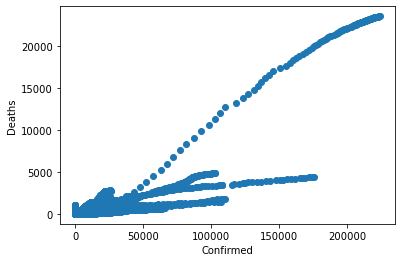

In [11]:
plt.scatter(x,y)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

In [12]:
#split dataset in features and target variable
columns_fields = ['Confirmed']
X = usa_county_wise_dataset[columns_fields] # Features
y = usa_county_wise_dataset.Deaths # Target variable

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [14]:
# Create Decision Tree classifer object
clf_decission_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_decission_tree = clf_decission_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_decission_tree_clf = clf_decission_tree.predict(X_test)

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decission_tree_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_decission_tree_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_decission_tree_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_decission_tree_clf))

Accuracy: 0.6834840956385102
Mean Absolute Error: 10.253466471312693
Correct Score: 0.6834840956385102
Kappa Score: 0.2438683863359229


In [17]:
clf_decission_tree_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_decission_tree_clf)
clf_decission_tree_confusion_matrix

array([[126718,    684,    371, ...,      0,      0,      0],
       [ 13780,    630,    300, ...,      0,      0,      0],
       [  5981,    525,    363, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      1],
       [     0,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [18]:
#Create a Random Forest Classifier
clf_random_forest = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_random_forest.fit(X_train,y_train)

y_pred_random_forest_clf = clf_random_forest.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random_forest_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_random_forest_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_random_forest_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_random_forest_clf))

Accuracy: 0.6828629974094365
Mean Absolute Error: 10.40704229838196
Correct Score: 0.6828629974094365
Kappa Score: 0.25143393411587256


In [20]:
clf_random_forest_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_random_forest_clf)
clf_random_forest_confusion_matrix

array([[126607,    707,    370, ...,      0,      0,      0],
       [ 13695,    636,    293, ...,      0,      0,      0],
       [  5887,    522,    360, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      1],
       [     0,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [21]:
# Create a Gaussian Classifier
clf_gaussian = GaussianNB()
clf_gaussian.fit(X_train, y_train)
y_pred_gaussian_clf = clf_gaussian.predict(X_test)

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gaussian_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_gaussian_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_gaussian_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_gaussian_clf))

Accuracy: 0.6818437592899308
Mean Absolute Error: 12.319313500658257
Correct Score: 0.6818437592899308
Kappa Score: 0.12089702896915389


In [23]:
clf_gaussian_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gaussian_clf)
clf_gaussian_confusion_matrix

array([[128220,      0,      0, ...,      0,      0,      0],
       [ 15156,      0,      0, ...,      0,      0,      0],
       [  7415,      0,      0, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [24]:
#split dataset in features and target variable
columns_list = ['Confirmed']
X = usa_county_wise_dataset[columns_list] # Features
# y = country_wise_latest_dataset.Deaths # Target variable
y = usa_county_wise_dataset['Deaths']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [25]:
count_field = usa_county_wise_dataset['Deaths']
count_field = pd.DataFrame(count_field)
# count_field = count_field.reset_index()
print(len(count_field))
totali = len(count_field)
# pozita = 0
# for index, row in count_field.iterrows():
#     if pozita % 20000 == 0:
#         print(f'Item {pozita} out of {totali}')
#     pozita += 1
#     try:
#         if row['Confirmed'] == 0:
#             count_field = count_field.drop(count_field.index[index])
#         elif row['Confirmed'] < 0:
#             count_field = count_field.drop(count_field.index[index])
#     except Exception as e:
#         continue

final_count_field = []
print('Finished first loop')
pozita = 0
for item in count_field['Deaths']:
    if pozita % 20000 == 0:
        print(f'Item {pozita} out of {totali}')
    pozita += 1
    if item > 0:
        final_count_field.append(item)
        
boxcox_target = stats.boxcox(final_count_field)
box_cox_param = boxcox_target[1]
background_color='#fbfbfb'
print('Finished')

627920
Finished first loop
Item 0 out of 627920
Item 20000 out of 627920
Item 40000 out of 627920
Item 60000 out of 627920
Item 80000 out of 627920
Item 100000 out of 627920
Item 120000 out of 627920
Item 140000 out of 627920
Item 160000 out of 627920
Item 180000 out of 627920
Item 200000 out of 627920
Item 220000 out of 627920
Item 240000 out of 627920
Item 260000 out of 627920
Item 280000 out of 627920
Item 300000 out of 627920
Item 320000 out of 627920
Item 340000 out of 627920
Item 360000 out of 627920
Item 380000 out of 627920
Item 400000 out of 627920
Item 420000 out of 627920
Item 440000 out of 627920
Item 460000 out of 627920
Item 480000 out of 627920
Item 500000 out of 627920
Item 520000 out of 627920
Item 540000 out of 627920
Item 560000 out of 627920
Item 580000 out of 627920
Item 600000 out of 627920
Item 620000 out of 627920
Finished


In [26]:
# Function for providing generalized results for regression model
def evaluate_model(model,x_train,y_train,x_test,y_test):
    '''
    Inputs
    1. regression model eg: LinearRegression(),LassoRegression() etc.
    2. training x data
    3. training y data
    4. testing x data
    5. testing y data
    '''
    model.fit(x_train,y_train)
    model_name=model.__class__.__name__
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print (f"Training score: {train_score}\nTesting score: {test_score}")
    
    y_pred=model.predict(x_test)
    print("Prediction completed.")
    df=pd.DataFrame({"Actual": y_test,
                     "Predicted":y_pred})
    
    #Apply inverse box cox to retrieve original target results
    df=inv_boxcox(df,box_cox_param)
    
    #Finding the difference between original and predicted
    df["difference"]=df.Predicted-df.Actual
    df.reset_index(inplace=True)
    
    #Plot actual vs predicted
    plt.figure(figsize=(10,5));
    sns.scatterplot(data=df,x="index",y="Actual",color='grey',label=["Actual"]).set_facecolor(background_color);
    sns.lineplot(data=df,x="index",y="Predicted",color='salmon',label=["Predicted"]);
    plt.legend(loc="right",bbox_to_anchor=(1.1,1));
    plt.title(model_name+" -Actual vs Predicted");
    plt.show()
    
    print ("Sample comparison file for actual and predicted target feature:")
    display(df.head())
    
    # Return the model for re-use if required.
    return model

In [27]:
#General data frame and function for storing and comparing model results.
df_model_results=pd.DataFrame(columns=["ModelName","TrainScore"])

def store_model_results(modl_name,train_score):
    global df_model_results
    row_loc=df_model_results.shape[0]+1
    df_model_results.loc[row_loc,["ModelName","TrainScore"]]=[modl_name,train_score]

In [28]:
def show_model_scores(x,y):
    global df_model_results
    df_model_results=df_model_results.iloc[0:0] #reset display dataframe
    for model in  [LinearRegression(),
                   Lasso(),
                   Ridge(),
                   ElasticNet()]:
        store_model_results(model.__class__.__name__, cross_val_score(model,x,y,cv=3).mean())
    df_model_results.sort_values("TrainScore",ascending=False,inplace=True)
    display(df_model_results)
    display(HTML('Selected model : <b>' + df_model_results.head(1)['ModelName'].values[0] + '</b>'))

In [29]:
# X_train, X_test, y_train, y_test
show_model_scores(X_train,y_train)

,ModelName,TrainScore
2,Lasso,0.812119
4,ElasticNet,0.812119
3,Ridge,0.812119
1,LinearRegression,0.812119


Training score: 0.8129615211589605
Testing score: 0.7937789652075178
Prediction completed.


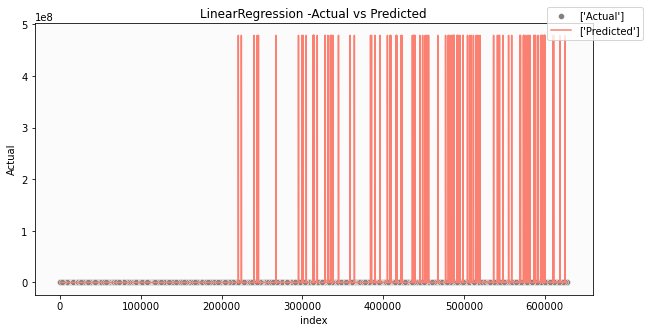

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,468427,NaN,NaN,NaN
1,337744,322.408269,0.049971,-322.358298
2,406542,1.000000,0.010071,-0.989929
3,358929,322.408269,0.033152,-322.375117
4,278314,1.000000,0.006423,-0.993577


LinearRegression()

In [30]:
evaluate_model(LinearRegression(),X_train,y_train,X_test,y_test)

Training score: 0.8129615211589605
Testing score: 0.7937789652075218
Prediction completed.


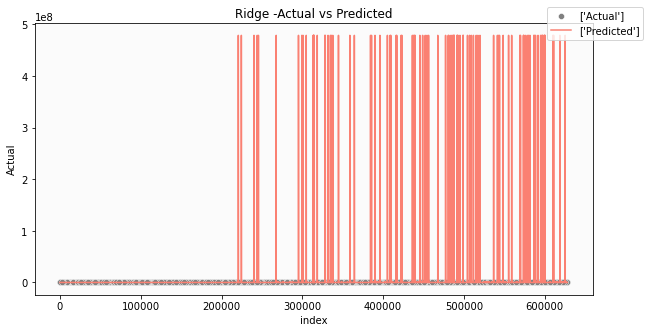

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,468427,NaN,NaN,NaN
1,337744,322.408269,0.049971,-322.358298
2,406542,1.000000,0.010071,-0.989929
3,358929,322.408269,0.033152,-322.375117
4,278314,1.000000,0.006423,-0.993577


Ridge()

In [31]:
evaluate_model(Ridge(),X_train,y_train,X_test,y_test)

Training score: 0.8129615211580783
Testing score: 0.7937790171331188
Prediction completed.


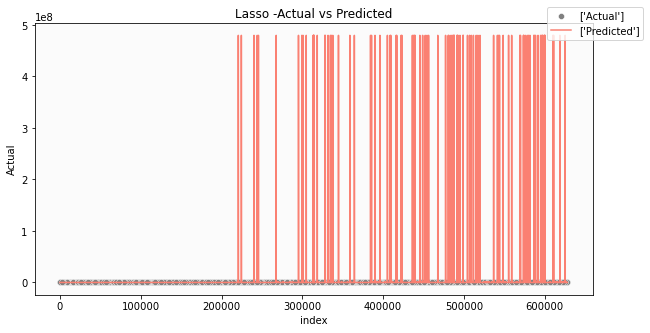

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,468427,NaN,NaN,NaN
1,337744,322.408269,0.049971,-322.358298
2,406542,1.000000,0.010071,-0.989929
3,358929,322.408269,0.033152,-322.375117
4,278314,1.000000,0.006423,-0.993577


Lasso()

In [32]:
evaluate_model(Lasso(),X_train,y_train,X_test,y_test)

Training score: 0.812961521158704
Testing score: 0.7937789932018928
Prediction completed.


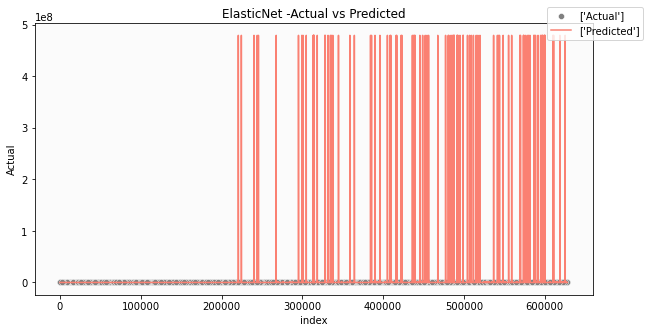

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,468427,NaN,NaN,NaN
1,337744,322.408269,0.049971,-322.358298
2,406542,1.000000,0.010071,-0.989929
3,358929,322.408269,0.033152,-322.375117
4,278314,1.000000,0.006423,-0.993577


ElasticNet()

In [33]:
evaluate_model(ElasticNet(),X_train,y_train,X_test,y_test)